In [105]:
import pandas as pd
df_anon = pd.read_csv("../../files/amitous_soumission584", sep='\t', header=None, names=['id', 'date', 'longitude', 'latitude'])
df_original = pd.read_csv("../../ref.csv", sep='\t', header=None, names=['id', 'date', 'longitude', 'latitude'])

In [30]:
df_anon

id                 date  longitude   latitude
3    {,.&=+#_>>-#?.}  2015-03-17 14:59:59   4.866892  45.755692
4    &}#?%[(.|%[@'-}  2015-04-18 04:59:59   4.865892  45.756492
5    \;$!~'<##_}?:^,  2015-04-02 20:59:59   4.873392  45.781992
6    ()+~>,_|}:*|?]<  2015-04-02 14:59:59   4.986892  45.699892
7    !#,!~*?[`+}_(-,  2015-04-08 22:54:58   4.869092  45.764292
..               ...                  ...        ...        ...
495  &}#?%[(.|%[@'-}  2015-04-19 02:59:59   4.865292  45.756192
496  &}#?%[(.|%[@'-}  2015-04-19 04:59:59   4.865592  45.755292
497  !#}{'|;.["{,,&}  2015-03-26 02:59:59   4.868792  45.764592
498  {,.&=+#_>>-#?.}  2015-03-18 14:59:59   4.822292  45.762592
499  {,.&=+#_>>-#?.}  2015-03-18 02:59:59   4.866792  45.756092

[428 rows x 4 columns]

In [36]:
#garder uniquement la semaine de la colonne date
df_original['Week'] = df_original['date'].dt.isocalendar().week

In [59]:
df_anon["date"] = pd.to_datetime(df_anon["date"])
df_original["date"] = pd.to_datetime(df_original["date"])


In [28]:
df_original["date"]

0                     date
1      2015-03-04 00:00:00
2      2015-03-04 00:00:00
3      2015-03-04 00:00:00
4      2015-03-04 00:00:00
              ...         
495    2015-03-04 02:00:00
496    2015-03-04 02:00:00
497    2015-03-04 02:00:00
498    2015-03-04 02:00:00
499    2015-03-04 02:00:00
Name: date, Length: 500, dtype: object

In [38]:
#suprimer les doublons e ajouter une colonne Size que l'on renomme Num
df_origin = df_original.groupby(["id", "Week", 'longitude', 'latitude'], as_index=False).size()
df_origin.rename(columns={"size": "Num"}, inplace=True)

In [46]:
df_origin

id  Week  longitude  latitude  Num
0      1    10   0.002177  0.733331    1
1      1    10   0.004610  0.374611    1
2      1    10   0.006366  0.188077    1
3      1    10   0.006706  0.768313    1
4      1    10   0.012685  0.975624    1
..   ...   ...        ...       ...  ...
494  496    10   0.173801  0.770294    1
495  497    10   0.835937  0.000620    1
496  498    10   0.350427  0.936959    1
497  DEL    10   0.527129  0.358134    1
498  DEL    10   0.668928  0.339484    1

[499 rows x 5 columns]

In [72]:
#fonction pour regrouper les données
import numpy as np

def zone_group(df, by=None, round_val=5,on=0.001):
    
    round_fun= lambda x: round(np.mean(x), round_val) if round_val!=0 else np.mean(x)

    df["date"] = pd.to_datetime(df["date"])
    df['Week'] = df['date'].dt.isocalendar().week

    df = df.groupby(by+['longitude', 'latitude'], as_index=False).size()
    df.rename(columns={"size": "Num"}, inplace=True)
    
    temp = df.sort_values("longitude")
    if by is not None:
        temp = temp.groupby(by)
    long_group = temp["longitude"].diff().gt(on).cumsum()
    
    temp = df.sort_values("latitude")
    if by is not None:
        temp = temp.groupby(by)
    lat_group = temp["latitude"].diff().gt(on).cumsum()
    
    temp = [long_group,lat_group]
    if by is not None:
        temp += by
    grouped = df.groupby(temp, as_index=False)
    grouped = grouped.agg(
        #Longitude_min=('longitude', np.min),
        #Latitude_min=('latitude', np.min),
        Longitude=('longitude', round_fun),
        Latitude=('latitude', round_fun),
        #Longitude_max=('longitude', np.max),
        #Latitude_max=('latitude', np.max),
        Num=('Num', np.sum))
 
    grouped.drop(grouped[grouped.Num < 10].index, inplace=True)
    
    return grouped.sort_values(by="Num")

In [55]:
temp=zone_group(df_origin, by=["Week", "id"],round_val=0,on=0.005 )

C:\Users\jules\AppData\Local\Temp\ipykernel_2096\3109838008.py:22: FutureWarning: The provided callable <function min at 0x000001786A397100> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grouped = grouped.agg(
C:\Users\jules\AppData\Local\Temp\ipykernel_2096\3109838008.py:22: FutureWarning: The provided callable <function max at 0x000001786A396FC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped = grouped.agg(
C:\Users\jules\AppData\Local\Temp\ipykernel_2096\3109838008.py:22: FutureWarning: The provided callable <function sum at 0x000001786A3968E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = group

In [56]:
temp

Week  id  Longitude_min  Latitude_min  Longitude  Latitude  Longitude_max  \
0    10   1       4.870095     45.771002   4.870736  45.77191       4.871628   

   Latitude_max  Num  
0     45.772503  500

In [43]:
df_origin.sort_values(["longitude"])

id  Week  longitude  latitude  Num
0    1    10   0.002177  0.733331    1
1    1    10   0.004610  0.374611    1
2    1    10   0.006366  0.188077    1
3    1    10   0.006706  0.768313    1
4    1    10   0.012685  0.975624    1
..  ..   ...        ...       ...  ...
484  1    10   0.992529  0.028120    1
485  1    10   0.994842  0.153490    1
486  1    10   0.995543  0.798102    1
487  1    10   0.995547  0.499075    1
488  1    10   0.997874  0.378341    1

[499 rows x 5 columns]

In [60]:
df_original['Week'] = df_original['date'].dt.isocalendar().week
df_origin = df_original.groupby(["id", "Week", 'longitude', 'latitude'], as_index=False).size()
df_origin.rename(columns={"size": "Num"}, inplace=True)
df_origin

id  Week  longitude   latitude  Num
0     1    10   4.870095  45.772133    1
1     1    10   4.870095  45.772142   16
2     1    10   4.870117  45.772135    1
3     1    10   4.870147  45.772140    1
4     1    10   4.870187  45.772203    1
..   ..   ...        ...        ...  ...
224   1    10   4.871623  45.771270    1
225   1    10   4.871623  45.771278    1
226   1    10   4.871625  45.771285    1
227   1    10   4.871628  45.771287    1
228   1    10   4.871628  45.771292    1

[229 rows x 5 columns]

In [61]:
temp=zone_group(df_origin, by=["Week", "id"],round_val=0,on=0.005 )

C:\Users\jules\AppData\Local\Temp\ipykernel_2096\3109838008.py:22: FutureWarning: The provided callable <function min at 0x000001786A397100> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  grouped = grouped.agg(
C:\Users\jules\AppData\Local\Temp\ipykernel_2096\3109838008.py:22: FutureWarning: The provided callable <function max at 0x000001786A396FC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  grouped = grouped.agg(
C:\Users\jules\AppData\Local\Temp\ipykernel_2096\3109838008.py:22: FutureWarning: The provided callable <function sum at 0x000001786A3968E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = group

In [62]:
temp

Week  id  Longitude_min  Latitude_min  Longitude  Latitude  Longitude_max  \
0    10   1       4.870095     45.771002   4.870736  45.77191       4.871628   

   Latitude_max  Num  
0     45.772503  500

In [63]:
df_anon['Week'] = df_anon['date'].dt.isocalendar().week
df_ano = df_original.groupby(["id", "Week", 'longitude', 'latitude'], as_index=False).size()
df_ano.rename(columns={"size": "Num"}, inplace=True)
df_ano

id  Week  longitude   latitude  Num
0     1    10   4.870095  45.772133    1
1     1    10   4.870095  45.772142   16
2     1    10   4.870117  45.772135    1
3     1    10   4.870147  45.772140    1
4     1    10   4.870187  45.772203    1
..   ..   ...        ...        ...  ...
224   1    10   4.871623  45.771270    1
225   1    10   4.871623  45.771278    1
226   1    10   4.871625  45.771285    1
227   1    10   4.871628  45.771287    1
228   1    10   4.871628  45.771292    1

[229 rows x 5 columns]

In [106]:
grouped_tra_ori=zone_group(df_original, by=["Week"],round_val=3,on=0.005 )

C:\Users\jules\AppData\Local\Temp\ipykernel_2096\173790465.py:28: FutureWarning: The provided callable <function sum at 0x000001786A3968E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = grouped.agg(
C:\Users\jules\AppData\Local\Temp\ipykernel_2096\173790465.py:28: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  grouped = grouped.agg(


In [107]:
grouped_tra_ori

Week  Longitude  Latitude      Num
2014    11      2.630    48.704       10
1228    11      2.168    44.544       10
1475    19      2.316    49.857       10
2185    11      2.721    44.544       10
3208    15      4.826    46.940       10
...    ...        ...       ...      ...
3334    14      4.926    45.746  2605296
3330    10      4.914    45.751  2820654
3332    12      4.880    45.770  2878326
3333    13      4.902    45.760  3423985
3331    11      4.877    45.773  4193327

[3412 rows x 4 columns]

In [108]:
size_ano=len(df_anon)
df_anon=df_anon[df_anon["id"]!="DEL"]
ratio=len(df_anon)/size_ano
grouped_tra_ano=zone_group(df_anon, by=["Week"],round_val=3,on=0.005 )

C:\Users\jules\AppData\Local\Temp\ipykernel_2096\173790465.py:28: FutureWarning: The provided callable <function sum at 0x000001786A3968E0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grouped = grouped.agg(
C:\Users\jules\AppData\Local\Temp\ipykernel_2096\173790465.py:28: FutureWarning: A grouping was used that is not in the columns of the DataFrame and so was excluded from the result. This grouping will be included in a future version of pandas. Add the grouping as a column of the DataFrame to silence this warning.
  grouped = grouped.agg(


In [118]:
grouped_tra_ano.Num=(grouped_tra_ano.Num/ratio).apply(int)

In [119]:
merged=pd.merge(grouped_tra_ori,grouped_tra_ano,on=["Week","Longitude","Latitude"])

In [120]:
merged

Week  Longitude  Latitude    Num_x  Num_y
0     12       0.97     47.29       10     81
1     11       6.33     46.15       14    150
2     12       2.08     47.24       16     90
3     16       4.50     46.77       23     51
4     12       0.86     49.61       24    107
5     18       4.73     44.41       24     90
6     11       4.73     44.41       25     98
7     13       2.38     43.19       25     51
8     18       2.81     43.17       26     81
9     17       2.19     49.55       27    202
10    18       2.81     42.01       31    107
11    16       2.19     49.55       32    202
12    14       4.73     44.41       32    124
13    15      -1.61     47.23       49  21540
14    12       0.69     47.32       60    124
15    14       0.14     48.08       61     43
16    18       1.54     41.26       61    111
17    14       7.10     43.57       90     81
18    11       5.73     45.51      129    142
19    12       5.73     45.51      131    150
20    10       4.04     43.67      228     47
21    13       2.56     49.01      502    714
22    15       4.48     43.66     1768    834
23    19       5.89     45.40     6556    275
24    10      -1.67     48.11    13087  54650
25    11       5.73     45.19    46476  45302
26    10       5.27     45.59   203605   2612
27    12       4.88     45.77  2878326  49954

In [115]:
ratio

0.4820260704427135

In [125]:
count=0
for line in merged.itertuples():
    count+=min(line[5]/line[4],line[4]/line[5])
score=count/len(merged)

In [126]:
score

0.36901217545334675

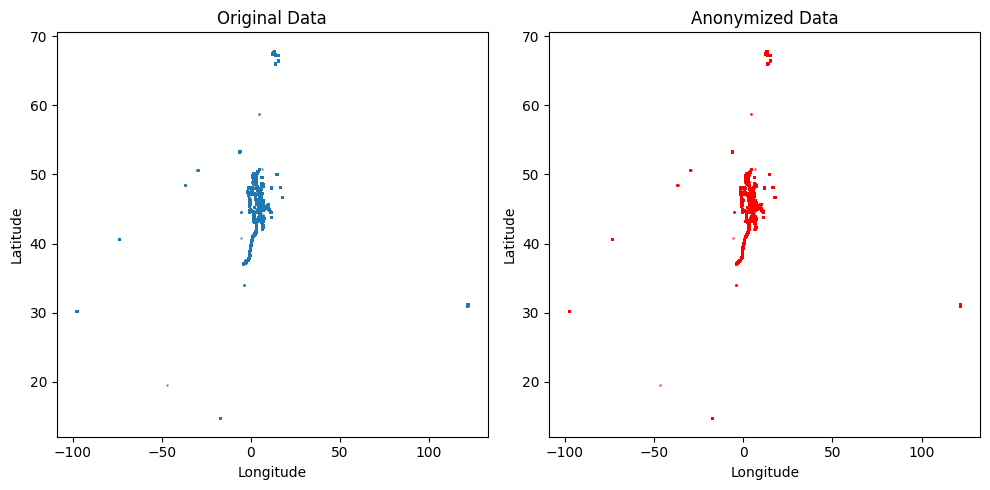

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))

# Données originales
plt.subplot(1, 2, 1)
plt.scatter(df_original['longitude'], df_original['latitude'], alpha=0.5, s=1)
plt.title('Original Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Données anonymisées
plt.subplot(1, 2, 2)
plt.scatter(df_anon['longitude'], df_anon['latitude'], alpha=0.5, s=1, color='r')
plt.title('Anonymized Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


C:\Users\jules\AppData\Local\Temp\ipykernel_2096\4154706195.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['lat_cat', 'long_cat'])['Num'].sum().unstack(fill_value=0)
C:\Users\jules\AppData\Local\Temp\ipykernel_2096\4154706195.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['lat_cat', 'long_cat'])['Num'].sum().unstack(fill_value=0)


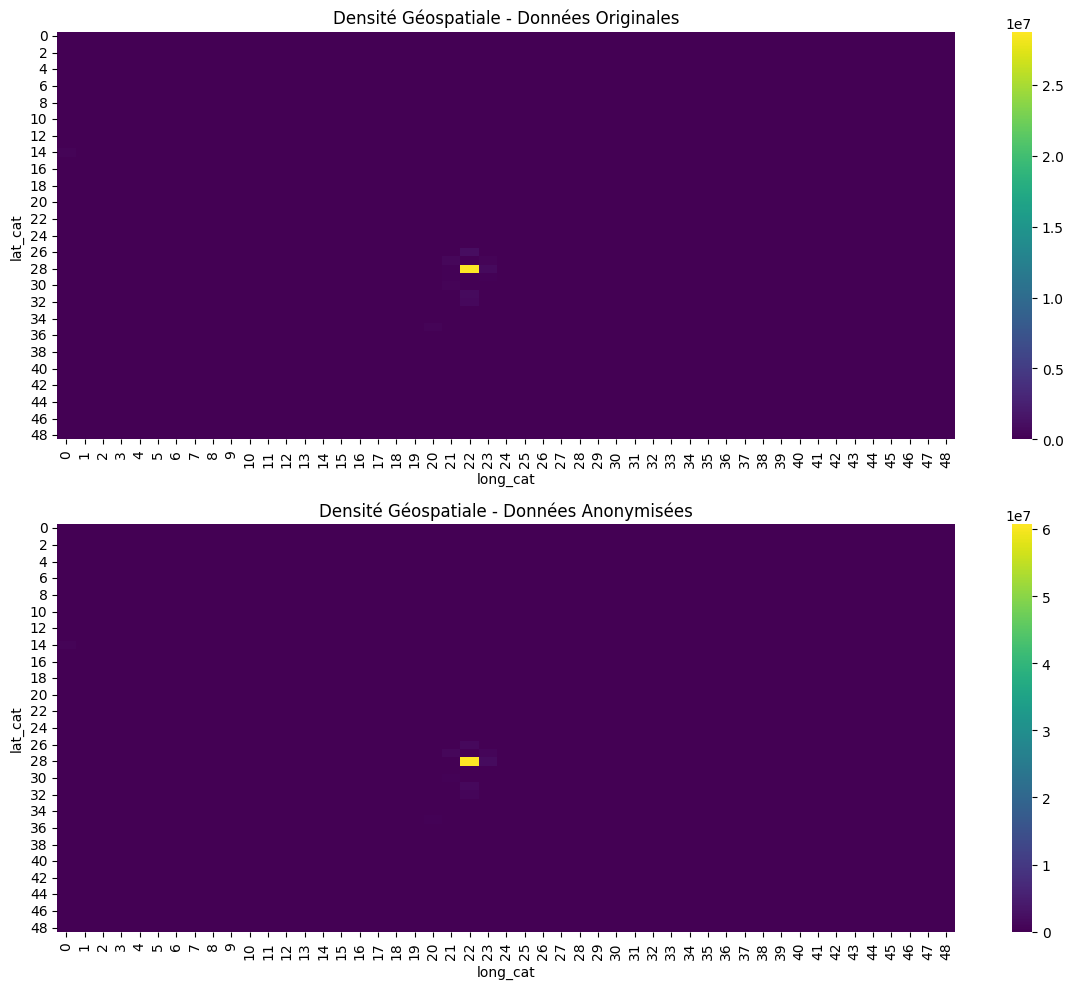

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que grouped_tra_ori et grouped_tra_ano sont vos DataFrames agrégés

def prepare_heatmap_data(df, lat_bins, long_bins):
    # Créer des catégories pour latitude et longitude
    df['lat_cat'] = pd.cut(df['Latitude'], bins=lat_bins, labels=np.arange(len(lat_bins)-1), include_lowest=True)
    df['long_cat'] = pd.cut(df['Longitude'], bins=long_bins, labels=np.arange(len(long_bins)-1), include_lowest=True)
    
    # Aggréger les données
    heatmap_data = df.groupby(['lat_cat', 'long_cat'])['Num'].sum().unstack(fill_value=0)
    
    return heatmap_data

# Définir les plages de latitude et longitude
lat_bins = np.linspace(df_original['latitude'].min(), df_original['latitude'].max(), 50)
long_bins = np.linspace(df_original['longitude'].min(), df_original['longitude'].max(), 50)

# Préparer les données pour les cartes de chaleur
heatmap_data_ori = prepare_heatmap_data(grouped_tra_ori, lat_bins, long_bins)
heatmap_data_ano = prepare_heatmap_data(grouped_tra_ano, lat_bins, long_bins)

# Affichage des cartes de chaleur
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.heatmap(heatmap_data_ori, cmap='viridis')
plt.title('Densité Géospatiale - Données Originales')

plt.subplot(2, 1, 2)
sns.heatmap(heatmap_data_ano, cmap='viridis')
plt.title('Densité Géospatiale - Données Anonymisées')

plt.tight_layout()
plt.show()


NameError: name 'LogNorm' is not defined

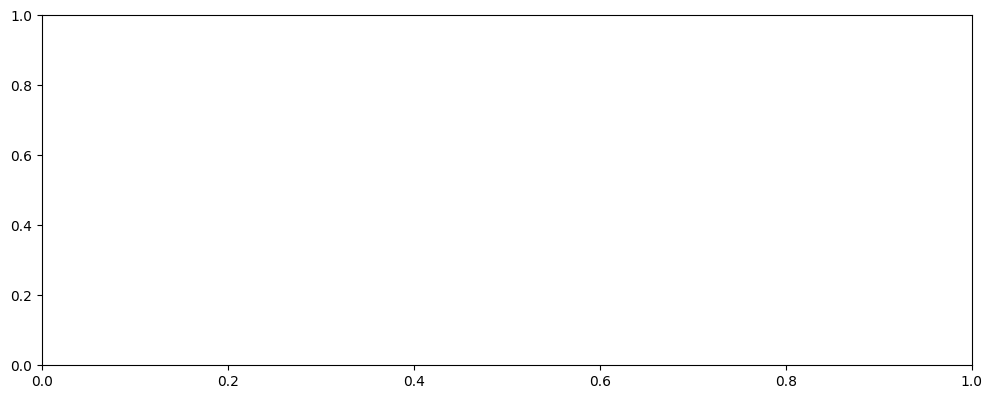

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que grouped_tra_ori et grouped_tra_ano sont vos DataFrames agrégés

def prepare_heatmap_data(df, lat_bins, long_bins):
    # Créer des catégories pour latitude et longitude
    df['lat_cat'] = pd.cut(df['Latitude'], bins=lat_bins, labels=np.arange(len(lat_bins)-1), include_lowest=True)
    df['long_cat'] = pd.cut(df['Longitude'], bins=long_bins, labels=np.arange(len(long_bins)-1), include_lowest=True)
    
    # Aggréger les données
    heatmap_data = df.pivot_table(index='lat_cat', columns='long_cat', values='Num', aggfunc='sum')
    
    # Remplacer les zéros par NaN pour les ignorer dans l'échelle logarithmique
    heatmap_data.replace(0, np.nan, inplace=True)
    
    # Utiliser la somme logarithmique pour les valeurs
    heatmap_data = np.log10(heatmap_data)
    
    return heatmap_data

# Définir les plages de latitude et longitude
lat_bins = np.linspace(df_original['latitude'].min(), df_original['latitude'].max(), 30) # Nombre de bins réduit
long_bins = np.linspace(df_original['longitude'].min(), df_original['longitude'].max(), 30) # Nombre de bins réduit

# Préparer les données pour les cartes de chaleur
heatmap_data_ori = prepare_heatmap_data(grouped_tra_ori, lat_bins, long_bins)
heatmap_data_ano = prepare_heatmap_data(grouped_tra_ano, lat_bins, long_bins)

# Affichage des cartes de chaleur avec une échelle logarithmique
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.heatmap(heatmap_data_ori, cmap='viridis', norm=LogNorm(vmin=heatmap_data_ori.min().min(), vmax=heatmap_data_ori.max().max()))
plt.title('Densité Géospatiale - Données Originales')

plt.subplot(2, 1, 2)
sns.heatmap(heatmap_data_ano, cmap='viridis', norm=LogNorm(vmin=heatmap_data_ano.min().min(), vmax=heatmap_data_ano.max().max()))
plt.title('Densité Géospatiale - Données Anonymisées')

plt.tight_layout()
plt.show()


In [5]:
print(merged.columns)

NameError: name 'merged' is not defined

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def agreger_donnees_geo(df):
    """
    Agrège les données géographiques en arrondissant et en comptant les occurrences.
    
    Paramètres :
    - df : DataFrame avec les colonnes longitude et latitude.
    - arrondi_decimales : Nombre de décimales pour l'arrondissement.
    
    Retourne :
    - DataFrame agrégé par longitude et latitude arrondies.
    """
    # Arrondir la longitude et la latitude pour réduire la granularité
    df['longitude_arrondie'] = df['longitude'].round(5)
    df['latitude_arrondie'] = df['latitude'].round(5)
    
    # Grouper par les valeurs arrondies et compter les occurrences
    agrege = df.groupby(['longitude_arrondie', 'latitude_arrondie']).size().reset_index(name='Compte')
    
    # Pivoter pour la carte de chaleur
    # Pivoter pour la carte de chaleur
    pivote = agrege.pivot(index='latitude_arrondie', columns='longitude_arrondie', values='Compte').fillna(0)

    
    return pivote

# Agréger les données
df_original_agrege = agreger_donnees_geo(df_original)
df_anon_agrege = agreger_donnees_geo(df_anon)

# Génération des graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Carte de chaleur pour les données originales
sns.heatmap(df_original_agrege, ax=ax1, cmap='YlGnBu', cbar=False)
ax1.set_title('Densité Géospatiale - Données Originales')

# Carte de chaleur pour les données anonymisées
sns.heatmap(df_anon_agrege, ax=ax2, cmap='YlGnBu', cbar=False)
ax2.set_title('Densité Géospatiale - Données Anonymisées')

for ax in [ax1, ax2]:
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed

C:\Users\jules\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 1873944948 is out of bounds for axis 0 with size 1873714772

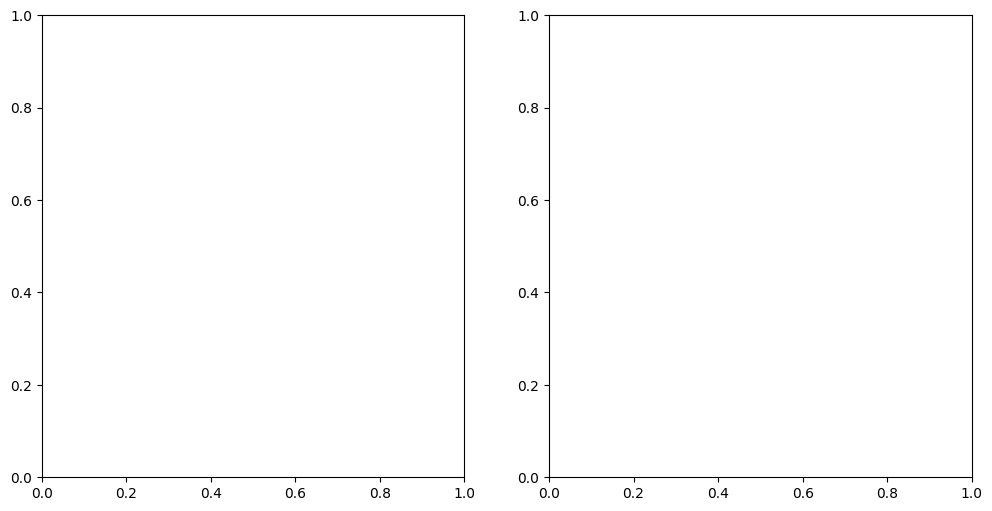

In [136]:
#Charger les données originales et anonymisées (df_original et df_anon)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot pour les données originales
sns.heatmap(df_original.groupby(['longitude', 'latitude']).size().unstack().fillna(0), ax=ax1, cmap='YlGnBu', cbar=False)
ax1.set_title('Densité Géospatiale - Données Originales')

# Plot pour les données anonymisées
sns.heatmap(df_anon.groupby(['longitude', 'latitude']).size().unstack().fillna(0), ax=ax2, cmap='YlGnBu', cbar=False)
ax2.set_title('Densité Géospatiale - Données Anonymisées')

# Ajuster les axes
for ax in [ax1, ax2]:
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()


In [128]:
print(df_original_agrege.head())
print(df_anon_agrege.head())


longitude_arrondie  -97.77   -97.76   -97.75   -97.74   -97.73   -97.72   \
latitude_arrondie                                                          
14.71                   0.0      0.0      0.0      0.0      0.0      0.0   
14.72                   0.0      0.0      0.0      0.0      0.0      0.0   
14.73                   0.0      0.0      0.0      0.0      0.0      0.0   
14.74                   0.0      0.0      0.0      0.0      0.0      0.0   
14.75                   0.0      0.0      0.0      0.0      0.0      0.0   

longitude_arrondie  -97.71   -97.70   -97.69   -97.68   ...   121.72   121.73  \
latitude_arrondie                                       ...                     
14.71                   0.0      0.0      0.0      0.0  ...      0.0      0.0   
14.72                   0.0      0.0      0.0      0.0  ...      0.0      0.0   
14.73                   0.0      0.0      0.0      0.0  ...      0.0      0.0   
14.74                   0.0      0.0      0.0      0.0  ...   